## Taux d'avancement en fonction de K° :


Dans ce programme, on considère une réaction chimique du type :

aA + bB + ... = cC + dD + ...

On suppose que le système est homogène (= toutes les espèces appartiennent à la même phase) et on travaille à volume V constant V = 1L. Ainsi, quantités de matière et concentrations correspondent aux même valeurs numériques.
Si un réactif est limitant, il doit s'agir de celui noté A.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from IPython.display import display, Markdown, Latex


In [2]:
def printm(s):
    display(Markdown(s))
    
    
def solve(X, Y):
    _abs = np.absolute(Y)
    _index = np.argmin(_abs)
    return X[_index] 

def eq(C, N):
    """Affiche l'équation formatée."""

    import string
    s = []
    for coef, letter in zip(C, string.ascii_uppercase):
        prefix = "+" if coef > 0 else "-"
        s.append("%s%s%s" % (prefix, abs(coef), letter))
    s = " ".join(s)
    s = "# $0 = %s$" % s
    display(Markdown(s))

In [12]:
def etat_final(C, N):
    """Calcul du taux d'avancement à l'équilibre pour une réaction donnée et des CI connues"""
    def F(N, C, x):
        a = N + C * x * N[0]/abs(C[0])
        q = np.prod(np.power(a, C))
        return q
    # quotient de la réation (fonction de x, le taux d'avancement)
    Q = np.vectorize(partial(F, N, C))

    K = 10**np.arange(-6., 7., 0.1)
    # on regarde si la réaction peut aller dans l'autre sens
    # ie s'il y a des produits à l'instant initial
    if (np.prod(N[C>0])!=0):
        x0 = -1
    else:
        x0 = 0
    X = np.arange(x0, 1., .001)
    taus = []

    # Pour quel valeur de X a-t-on égalité entre le quotient de la réaction et la constante d'équilibre
    for k in K:
        Y = Q(X) - k
        tau = solve(X, Y)
        taus.append(tau)

    eq(C,N)

    plt.plot(K, taus)
    plt.xscale('log')
    plt.title(r"Évolution de $\tau_{eq}$ en fonction de $K$")
    plt.ylabel(r"taux d'avancement $\tau_{eq}$")
    plt.xlabel(r"Constante d'équilibre $K$")
    plt.grid(True)
    plt.show()
    
    return Q, X

## Exemple 1 : 

# $0 = -1A -1B +1C +1D$

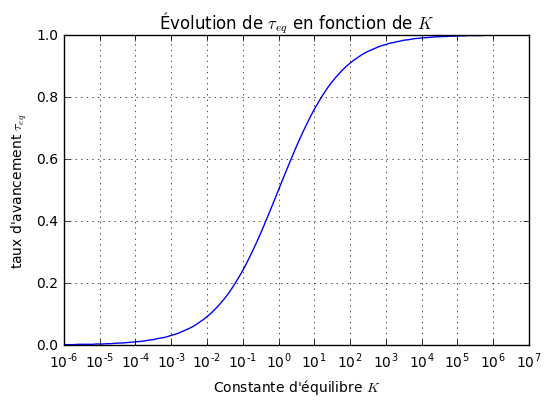

In [4]:
C = np.asarray([-1, -1, 1, 1])
N = np.asarray([1, 1, 0, 0])
Q, X = etat_final(C, N)

In [5]:
K = 10**4
Y = Q(X) - K
tau = solve(X, Y)
printm("Pour $K$ =%s , $\\tau_{eq}$ = %s" %(K,tau))

Pour $K$ =10000 , $\tau_{eq}$ = 0.99

## Exemple 2 = modification des CI

# $0 = -1A -1B +1C +1D$

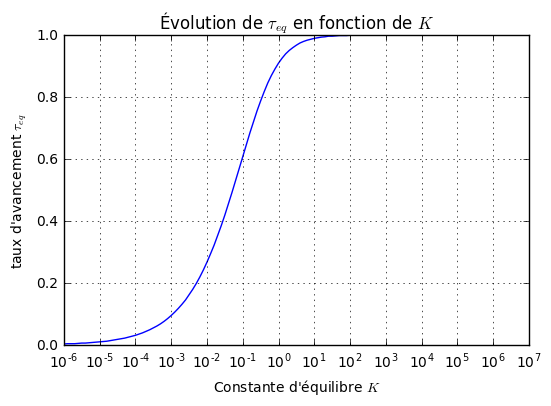

In [6]:
C = np.asarray([-1, -1, 1, 1])
N = np.asarray([0.1, 1, 0, 0])
Q, X = etat_final(C, N)

In [7]:
K = 10**4
Y = Q(X) - K
tau = solve(X, Y)
printm("Pour $K$ =%s , $\\tau_{eq}$ = %s" %(K,tau))

Pour $K$ =10000 , $\tau_{eq}$ = 0.999

## Exemple 3 :  modification des coefficients stoechiométriques

# $0 = -6A -3B +1C +1D$

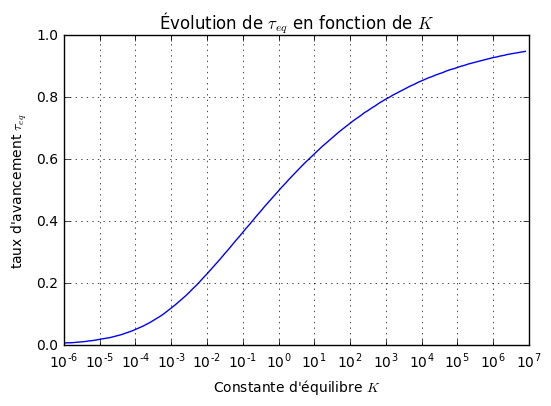

In [8]:
C = np.asarray([-6, -3, 1, 1])
N = np.asarray([1, 1, 0, 0])
Q, X = etat_final(C, N)

In [9]:
K = 10**4
Y = Q(X) - K
tau = solve(X, Y)
printm("Pour $K$ =%s , $\\tau_{eq}$ = %s" %(K,tau))

Pour $K$ =10000 , $\tau_{eq}$ = 0.852

## Exemple 4 : quantités de matière des produits non nulles à t=0

# $0 = -1A -1B +1C +1D$

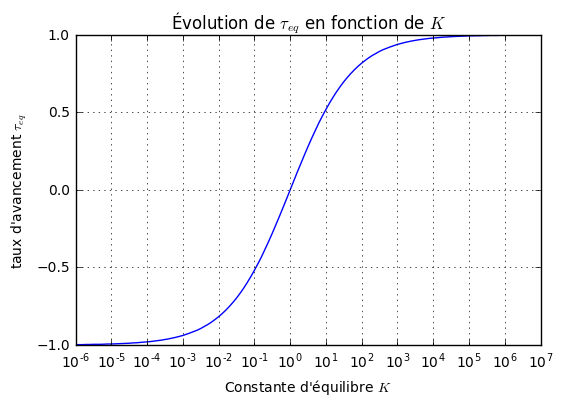

In [10]:
C = np.asarray([-1, -1, 1, 1])
N = np.asarray([1, 1, 1, 1])
Q, X = etat_final(C, N)

In [11]:
K = 10**4
Y = Q(X) - K
tau = solve(X, Y)
printm("Pour $K$ =%s , $\\tau_{eq}$ = %s" %(K,tau))

Pour $K$ =10000 , $\tau_{eq}$ = 0.98